## 기본 실습 문제

In [1]:
import numpy as np

raw_data_link = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt'
raw_data = np.genfromtxt(raw_data_link, skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

1열은 인덱스, 2열의 1들은 구분선 표시, 3열 ~ 5열까지가 실제로 들어있는 데이터이다.

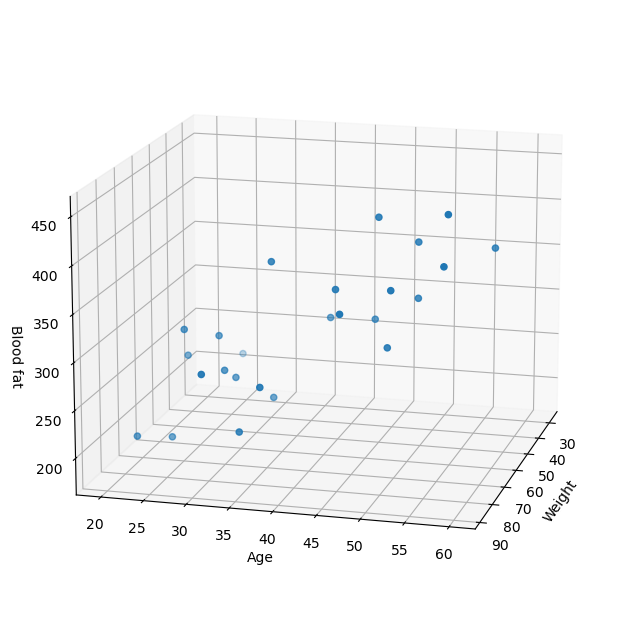

In [6]:
# 어떻게 생겼을까?
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype = np.float32)
ys = np.array(raw_data[:,3], dtype = np.float32)
zs = np.array(raw_data[:,4], dtype = np.float32)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

현재 raw_data에서 얻고자 하는 것은 Age, Weight 값을 주었을 때 Blood fat을 예측하는 것이다.

Linear Regression 모델로 이를 풀어보자.

In [7]:
# Train
x_data = np.array(raw_data[:, 2:4], dtype = np.float32)
y_data = np.array(raw_data[:,4], dtype = np.float32) # (25, )

y_data = y_data.reshape((25, 1)) # (25, )은 numpy 연산이 되지 않으므로 (25, 1)로 reshape
x_data.shape, y_data.shape

((25, 2), (25, 1))

In [9]:
!pip install tensorflow

In [11]:
# 모델링
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2, )), # 얻고자 하는 입력 shape이 2개, bias 1개
])
model.compile(optimizer = 'rmsprop', loss = 'mse') # mse를 기준으로 최적화하는 가중치 반환

* loss 함수

    학습을 위해서 정해주어야하는 함수로, 정답까지 얼마나 멀리 있는지를 측정할 수 있는 함수이다.
    loss 함수를 설정하고 optimizer를 설정하는 방식인데, optimizer는 loss를 어떻게 줄일 것인지를 결정하는 방법을 선택하는 것이다.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


weight 2개와 bias 1개 총 3개의 param을 찾아야함을 알려주고 있다.

위 과정은 모델을 구성(네트워크, loss, optimizer 설정)한 것이고 이제 학습을 해야한다.

In [14]:
# 학습
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 5ms/step - loss: 38959.1758
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 38908.6523
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 38859.2812
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 38810.8984
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 38763.3594
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 38716.5469
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 38670.3516
Epoch 8/5000
1/1 [==============================] - 0s 6ms/step - loss: 38624.7188
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 38579.5664
Epoch 10/5000
1/1 [==============================] - 0s 28ms/step - loss: 38534.8398
Epoch 11/5000
1/1 [==============================] - 0s 5ms/step - loss: 38490.4883
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 38446.4727


epochs을 늘어날 수록 loss값이 떨어지는 것을 보고 있다. 

Text(0.5, 1.0, 'Loss Value by epochs')

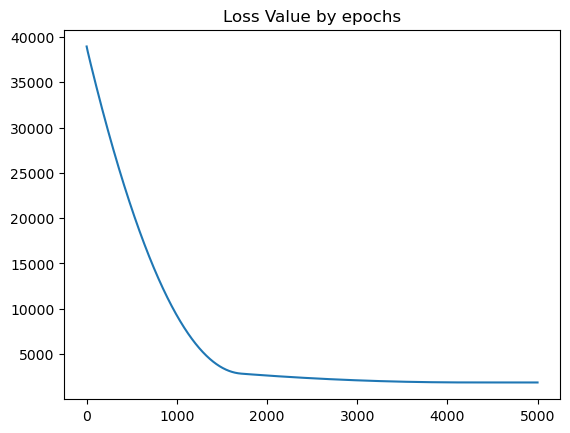

In [16]:
plt.plot(hist.history['loss'])
plt.title('Loss Value by epochs')

한 3천번 정도까지만 했어도 충분해보인다!

이제 학습된 모델로 예측을 해보자.

In [17]:
# age : 100, weight : 44
model.predict(np.array([100, 44]).reshape(1, 2))

1/1 [==============================] - 0s 105ms/step


array([[375.01584]], dtype=float32)

In [18]:
# age : 60, weight : 25
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 [==============================] - 0s 21ms/step


array([[219.20068]], dtype=float32)

학습된 모델의 가중치와 bias 확인도 가능하다

In [20]:
W_, b_ = model.get_weights()
W_, b_

(array([[1.2490779],
        [5.57116  ]], dtype=float32),
 array([4.977017], dtype=float32))

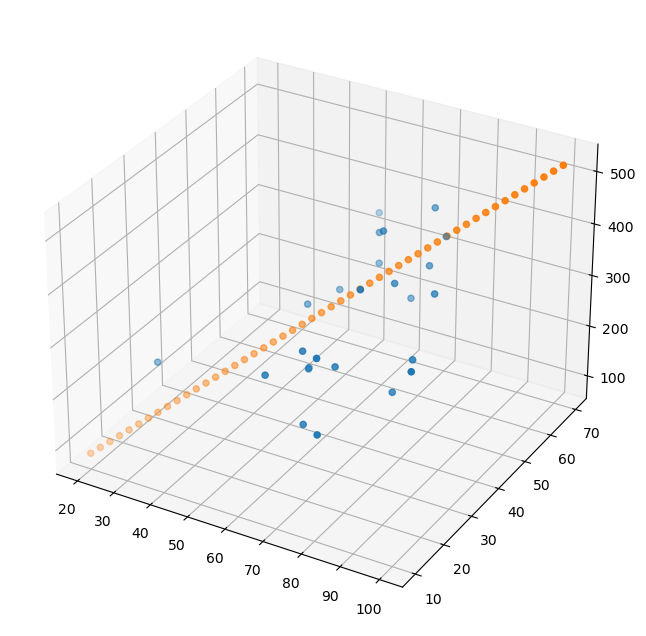

In [23]:
# 구해진 모델의 시각화
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50, 1)
X = np.concatenate((x, y), axis = 1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)

기존의 데이터와 우리가 구한 모델(노란색 선)을 같이 시각화해볼 수도 있다.

## XOR 문제

(0, 0) -> 0 , (0, 1) -> 1 , (1, 0) -> 1 , (1, 1) -> 0을 반환하는 것이 XOR 문제이다.

따라서 직선 하나로 문제를 해결할 수 있었던 앞선 문제와는 달리 XOR 문제는 직선 하나로 해결할 수 없다. 
즉, 뉴런 하나로 해당 문제를 해결할 수 없다는 뜻이기도 하다.

In [24]:
# 데이터 준비
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([[0], [1], [1], [0]])

In [26]:
# 모델링
model = tf.keras.Sequential([
    # 입력을 2개 받아 각각 출력한 다음
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape = (2, )),
    # 출력된 결과를 하나로 모아줌
    tf.keras.layers.Dense(1, activation='sigmoid')

    # 이때 activation 함수로 sigmoid를 설정한 이유는
    # 비선형 함수를 같이 통과시켜 주는 데에 의의가 있다.
    # 디폴트 설정은 선형 함수(직선)이므로 이를 두 번 통과시키면 결국엔 선형 함수가 되어버려
    # 우리가 기존에 직선 하나로 해결할 수 없어 레이어를 2번 쌓은 효과가 사라진다.
    # 따라서 선형이 되지 않도록 activation 함수를 비선형 함수인 sigmoid를 설정해준 것이다.
])

In [27]:
# 확률적으로 샘플링하여 학습시킨 후 계산하라는 코드
model.compile(optimizer=tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# epochs : 지정된 횟수만큼 학습
# batch_size : 한 번의 학습에 사용될 데이터의 개수
hist = model.fit(X, y, epochs=5000, batch_size=1) 

Epoch 1/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2841
Epoch 2/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2838
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 4/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2833
Epoch 5/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2830
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 7/5000
4/4 [==============================] - 0s 996us/step - loss: 0.2825
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 9/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 10/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2817
Epoch 11/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 12/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2812
Epoch 13/5000
4/4 [============================

다음에 이야기할 소재이지만 언급만 해놓자면, 레이어가 2개 이상일 때 오차를 어떻게 계산하는지가 항상 의문이었다.

맨 마지막 단계에서는 실제값이 있으니 오차를 계산할 수 있지만, 중간 단계에서는 실제값이 없기 때문에 오차 계산이 어려웠던 것이다. 이후, "역전파"라는 개념이 등장하면서 이를 효과적으로 풀 수 있게 되었는데 이 이론은 다음 시간에 학습하도록 하자.

In [29]:
# 학습 결과
model.predict(X)

1/1 [==============================] - 0s 80ms/step


array([[0.5171538],
       [0.4854689],
       [0.5130728],
       [0.4818946]], dtype=float32)

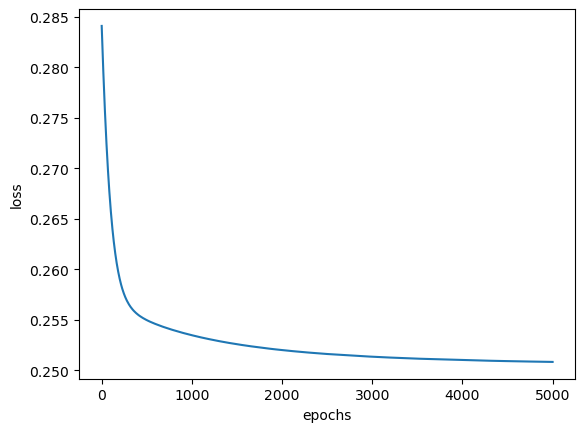

In [31]:
plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

이번에는 분류 문제를 실습해보자.

## iris 데이터

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

우리는 오차를 (실제값 - 예측값) 형식으로 두 차이를 계산을 했는데 분류에서는 오차를 이렇게 계산하면 안된다.

이런 방식이 가능하도록 데이터를 변형시켜주어야하는데 이 때 사용할 수 있는 것이 원 핫 인코딩이다.

In [34]:
# y label 변형
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))
enc.categories_

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array([0, 1, 2])]

In [35]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot[:3] # 이런 형태로 변환되었다.

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [36]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

이때 relu는 레이어가 깊어질수록 gradient vanishing 현상이 생기는 sigmoid 함수를 대신하기 위해 사용하는 것이고

다중 클래스 분류 문제에서는 각각의 클래스가 될 확률을 반환해주는 softmax를 사용하는 것이 일반적이다.

In [37]:
# 모델링
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape = (4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [39]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1031 - accuracy: 0.6500
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9416 - accuracy: 0.6500
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.7750
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7968 - accuracy: 0.8500
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7382 - accuracy: 0.9417
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.9250
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.9083
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.9167
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.9500
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.9667
Epoch 11/100
4/4 [===========

In [41]:
# 모델 평가
model.evaluate(X_test, y_test, verbose = 2)

1/1 - 0s - loss: 0.0986 - accuracy: 1.0000 - 187ms/epoch - 187ms/step


[0.09855823218822479, 1.0]

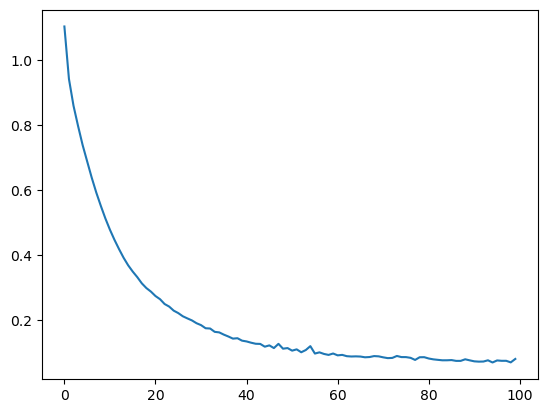

In [44]:
plt.plot(hist.history['loss'])

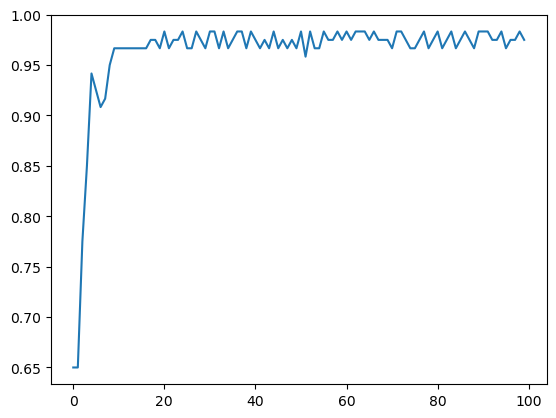

In [43]:
plt.plot(hist.history['accuracy'])

## MNIST

In [45]:
# 데이터 읽기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0
# 각 픽셀은 255가 최대값이여서 이를 나눠줌으로써 0 ~ 1사이의 값으로 조정해주었다.

11490434/11490434 [==============================] - 2s 0us/step


이전 흐름과 비슷하게 간다면 이 또한 다중 분류 문제이므로 y의 값을 원핫 인코딩을 이용해 변환해주어야한다. 

이 과정이 귀찮다면(?) 이와 비슷한 기능을 하는 loss function을 이용하면 된다. 이번 실습에서는 이것을 한 번 이용해보자.

In [48]:
x_train.shape

(60000, 28, 28)

In [47]:
x_train[0].shape

(28, 28)

In [49]:
# 모델링
model = tf.keras.models.Sequential([
    # (28, 28) 픽셀이 input_shape이 된다. 이를 1열로 쫙 펴준다.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    # 1000개의 노드를 거치자
    tf.keras.layers.Dense(1000, activation='relu'),
    # 0 ~ 9사이의 클래스 중 어디에 속할지 확인
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 1000)              785000    
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2228 - accuracy: 0.9348 - val_loss: 0.1125 - val_accuracy: 0.9668
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.0808 - val_accuracy: 0.9754
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0581 - val_accuracy: 0.9813
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0576 - val_accuracy: 0.9822
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0625 - val_accuracy: 0.9817
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0705 - val_accuracy: 0.9800
Epoch 

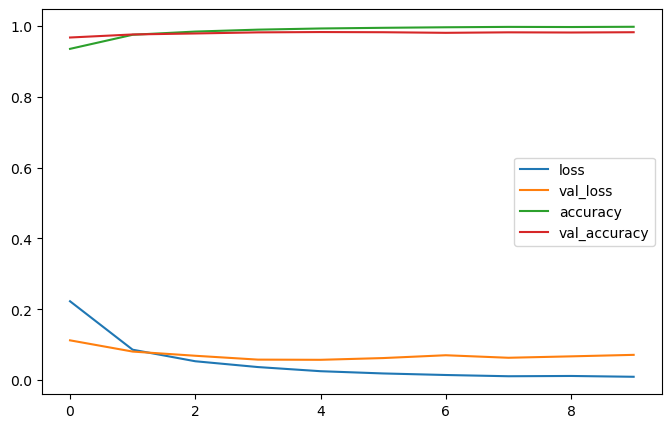

In [53]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (8, 5))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()

In [54]:
score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9817
Test loss :  0.07156745344400406
Test accuracy :  0.9817000031471252


In [55]:
# 그래서 이 모델이 어떻게 쓰이는데?
predicted_result = model.predict(x_test)
predicted_result[0] # 첫번째 데이터에 대한 predict 값

313/313 [==============================] - 1s 2ms/step


array([1.5260557e-11, 4.0400780e-11, 4.4488035e-10, 1.2108550e-06,
       2.6351195e-14, 3.2343700e-12, 1.9304675e-17, 9.9999881e-01,
       2.2159567e-10, 3.5912335e-09], dtype=float32)

In [56]:
predicted_result[0].max()

0.9999988

In [57]:
predicted_result[0].argmax() # 해당 데이터는 7

7

In [58]:
# 이를 한번에 사용하려면 아래와 같이
predicted_label = np.argmax(predicted_result, axis = 1)
predicted_label

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [59]:
# 실제 데이터는 아래와 같음
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [60]:
# 예측이 틀린 것들을 한 번 살펴보자
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_label[n] != y_test[n]:
        wrong_result.append(n) # 틀린 인덱스 
len(wrong_result) # 틀린 값들 개수

183

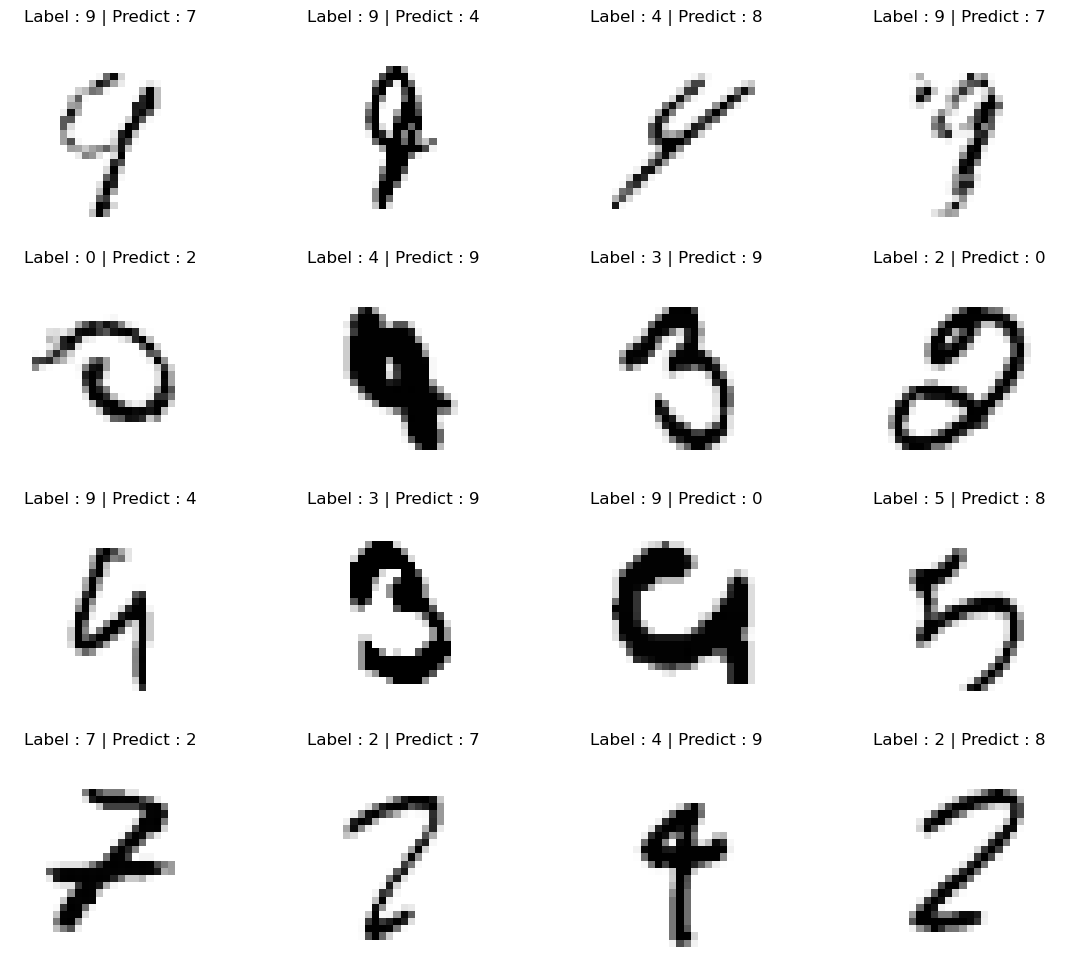

In [61]:
import random 
samples = random.choices(population=wrong_result, k = 16) # 틀린 것들 중 랜덤으로 몇 개만 살펴보자.

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28) , cmap = 'Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_label[n]))
    plt.axis('off')
plt.show()

## MNIST Fashion

In [62]:
# 데이터 읽기
# 패션과 관련된 10개 종류의 데이터 
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


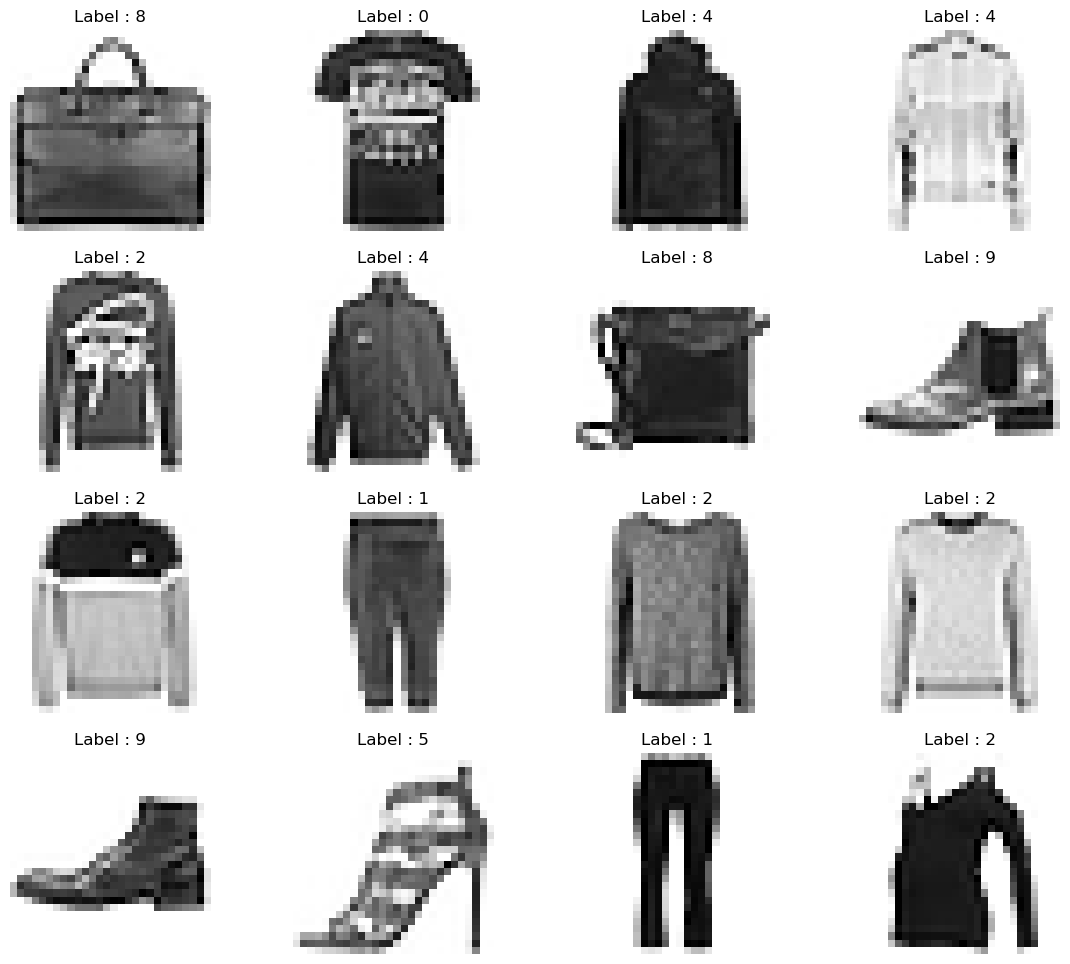

In [63]:
# 데이터가 어떻게 생겼는지 확인해보자.
import random 
samples = random.choices(population=range(0, len(y_train)), k = 16) 

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28) , cmap = 'Greys')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')
plt.show()

In [64]:
# 모델링
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 0.4853 - accuracy: 0.8305 - val_loss: 0.4000 - val_accuracy: 0.8570
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3595 - accuracy: 0.8695 - val_loss: 0.3895 - val_accuracy: 0.8594
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3217 - accuracy: 0.8817 - val_loss: 0.3648 - val_accuracy: 0.8712
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2983 - accuracy: 0.8884 - val_loss: 0.3499 - val_accuracy: 0.8755
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2795 - accuracy: 0.8957 - val_loss: 0.3358 - val_accuracy: 0.8787
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2662 - accuracy: 0.9006 - val_loss: 0.3389 - val_accuracy: 0.8748
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2544 - accuracy: 0.9060 - val_loss: 0.3256 - val_accuracy: 0.8806
Epoch 

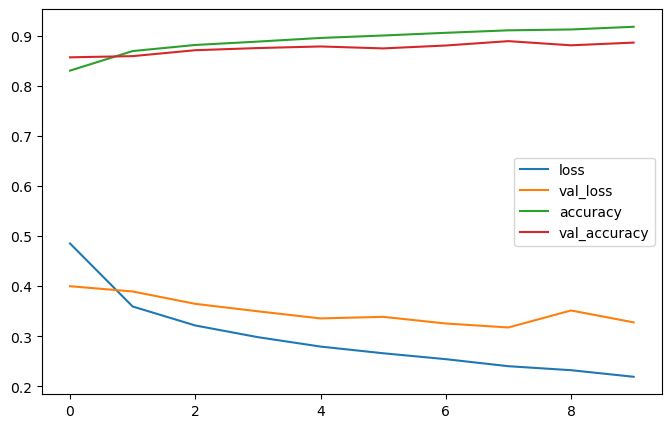

In [65]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (8, 5))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()

loss function이 상승하기 전이 좋은 구간 :)

In [66]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8864
Test loss :  0.327869176864624
Test accuracy :  0.8863999843597412


## CNN

In [67]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [68]:
# channel이 들어가므로 해당 차원과 맞춰주기 위한 reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [69]:
# 모델링
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu',
                  input_shape = (28, 28, 1)),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])


In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [71]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1147 - accuracy: 0.9643 - val_loss: 0.0474 - val_accuracy: 0.9842
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0361 - val_accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0261 - val_accuracy: 0.9920
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0297 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0360 - val_accuracy: 0.9894


In [72]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0360 - accuracy: 0.9894
Test loss :  0.03604891151189804
Test accuracy :  0.9894000291824341


In [74]:
predicted_result = model.predict(X_test)
predicted_label = np.argmax(predicted_result, axis = 1)

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_label[n] != y_test[n]:
        wrong_result.append(n) # 틀린 인덱스 
len(wrong_result) # 틀린 값들 개수

313/313 [==============================] - 2s 6ms/step


106

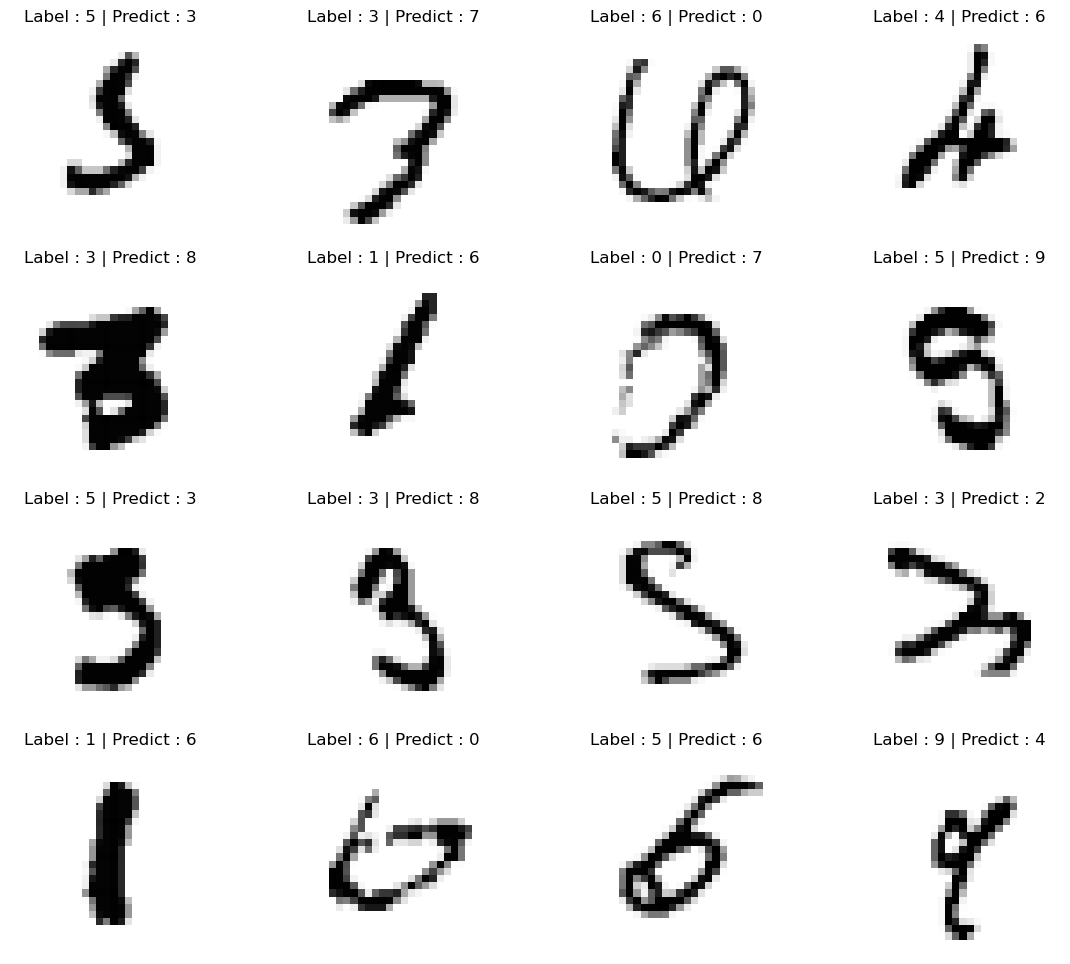

In [75]:
import random 
samples = random.choices(population=wrong_result, k = 16) # 틀린 것들 중 랜덤으로 몇 개만 살펴보자.

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28) , cmap = 'Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_label[n]))
    plt.axis('off')
plt.show()